# Wine dataset by ANN, tensorflow.keras

In [1]:
# 랜덤 시드 설정
import numpy as np
import tensorflow as tf
np.random.seed(0)
tf.random.set_seed(0)

In [2]:
# 데이터 불러오기
from sklearn import datasets
raw_wine = datasets.load_wine()

In [3]:
# 피쳐, 타겟 데이터 지정
X = raw_wine.data
y = raw_wine.target

In [4]:
# 피쳐 데이터 차원 확인
print(X.shape)

(178, 13)


In [5]:
# 타겟 데이터 종류 확인
print(set(y))

{0, 1, 2}


In [6]:
# 타겟 데이터 원-핫 인코딩
from tensorflow.keras.utils import to_categorical
y_hot = to_categorical(y) 
print(y_hot)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

In [7]:
# 트레이닝/테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te=train_test_split(X, y_hot, 
                                        random_state=0)

In [8]:
# 신경망 생성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation

n_feat = X_tn.shape[1]
n_class = len(set(y))
epo = 30

model = Sequential()
model.add(Dense(20, input_dim=n_feat))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(n_class))
model.add(Activation('softmax'))

In [9]:
# 신경망 모형 구조 확인
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                280       
_________________________________________________________________
batch_normalization (BatchNo (None, 20)                80        
_________________________________________________________________
activation (Activation)      (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 63        
_________________________________________________________________
activation_1 (Activation)    (None, 3)                 0         
Total params: 423
Trainable params: 383
Non-trainable params: 40
_________________________________________________________________


In [9]:
# 모형 컴파일
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [10]:
# 신경망 학습
hist = model.fit(X_tn, y_tn, epochs=epo, batch_size=5)

Epoch 1/30
27/27 [==============================] - 1s 2ms/step - loss: 1.9798 - accuracy: 0.3459
Epoch 2/30
27/27 [==============================] - 0s 2ms/step - loss: 1.6155 - accuracy: 0.3835
Epoch 3/30
27/27 [==============================] - 0s 2ms/step - loss: 1.2918 - accuracy: 0.3985
Epoch 4/30
27/27 [==============================] - 0s 3ms/step - loss: 1.0279 - accuracy: 0.4436
Epoch 5/30
27/27 [==============================] - 0s 2ms/step - loss: 0.9092 - accuracy: 0.5263
Epoch 6/30
27/27 [==============================] - 0s 2ms/step - loss: 0.8728 - accuracy: 0.6015
Epoch 7/30
27/27 [==============================] - 0s 2ms/step - loss: 0.8734 - accuracy: 0.5639
Epoch 8/30
27/27 [==============================] - 0s 2ms/step - loss: 0.7951 - accuracy: 0.6241
Epoch 9/30
27/27 [==============================] - 0s 2ms/step - loss: 0.8200 - accuracy: 0.5940
Epoch 10/30
27/27 [==============================] - 0s 4ms/step - loss: 0.7862 - accuracy: 0.6165: 0s - loss: 0.7867 

In [12]:
# 트레이닝 데이터 평가
print(model.evaluate(X_tn, y_tn)[1])

5/5 [==============================] - 0s 4ms/step - loss: 0.9379 - accuracy: 0.5789
0.5789473652839661


In [13]:
# 테스트 데이터 평가
print(model.evaluate(X_te, y_te)[1])

2/2 [==============================] - 0s 3ms/step - loss: 0.9154 - accuracy: 0.6444
0.644444465637207


In [14]:
import numpy as np
epoch = np.arange(1,epo+1)
print(epoch)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]


In [15]:
accuracy = hist.history['accuracy'] 
print(accuracy)

[0.3458646535873413, 0.3834586441516876, 0.39849624037742615, 0.4436090290546417, 0.5263158082962036, 0.6015037298202515, 0.5639097690582275, 0.6240601539611816, 0.5939849615097046, 0.61654132604599, 0.6616541147232056, 0.6842105388641357, 0.6842105388641357, 0.6992481350898743, 0.7142857313156128, 0.7744361162185669, 0.7518796920776367, 0.7518796920776367, 0.7443609237670898, 0.7894737124443054, 0.7969924807548523, 0.7669172883033752, 0.8421052694320679, 0.8345864415168762, 0.8270676732063293, 0.8195488452911377, 0.8571428656578064, 0.8195488452911377, 0.8571428656578064, 0.8571428656578064]


In [16]:
loss = hist.history['loss'] 
print(loss)

[1.9797742366790771, 1.6155288219451904, 1.2918165922164917, 1.0279443264007568, 0.9091541171073914, 0.8727607131004333, 0.8733514547348022, 0.7951135635375977, 0.8200013041496277, 0.7861714959144592, 0.7411353588104248, 0.7207063436508179, 0.7283971905708313, 0.7208575010299683, 0.6616654992103577, 0.6384326815605164, 0.6166559457778931, 0.6317903995513916, 0.7049684524536133, 0.5677063465118408, 0.5816744565963745, 0.5671247243881226, 0.4888368248939514, 0.5791000723838806, 0.5098254680633545, 0.476428359746933, 0.42427700757980347, 0.46958184242248535, 0.45588818192481995, 0.45778656005859375]


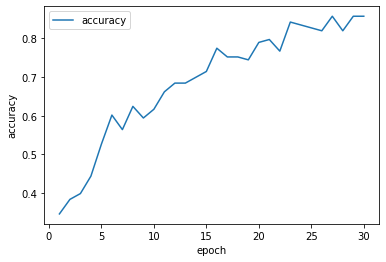

In [17]:
# 정확도 학습 그래프
import matplotlib.pyplot as plt

plt.plot(epoch, accuracy, label='accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

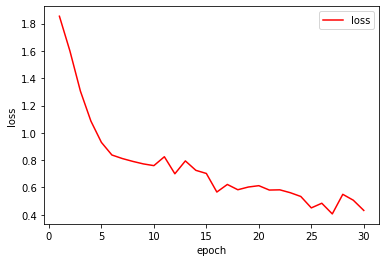

In [18]:
# 손실 그래프
import matplotlib.pyplot as plt

plt.plot(epoch, loss,'r', label='loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

# XOR problem by tensorflow.keras

In [58]:
from sklearn import datasets
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation

import matplotlib.pyplot as plt

# 랜덤 시드 설정
np.random.seed(1)
tf.random.set_seed(1)

# 데이터 불러오기
#raw_wine = datasets.load_wine()

# 피쳐, 타겟 데이터 지정
#X = raw_wine.data
#y = raw_wine.target

#X_tn = np.array([[1, 0, 1], [0, 1, 1], [0, 0, 1], [1, 1, 1]])

X_tn = np.array([[1, 0], [0, 1], [0, 0], [1, 1]])

y_tn = np.array([[1], [1], [0], [0]])

# 피쳐 데이터 차원 확인
print(X_tn.shape)

# 타겟 데이터 종류 확인
#print(set(y))

# 타겟 데이터 원-핫 인코딩
#y_tn = to_categorical(y_tn) 
#print(y_tn)
# 트레이닝/테스트 데이터 분할
#X_tn, X_te, y_tn, y_te=train_test_split(X, y_hot, random_state=0)

# 신경망 생성
n_feat = X_tn.shape[1]
#print(n_feat)
#n_class = len(set(y_tn))
n_class = y_tn.shape[1]
print(n_class)

epo = 3000

model = Sequential()
model.add(Dense(10, input_dim=n_feat))
#model.add(BatchNormalization())
#model.add(Activation('relu'))
model.add(Activation('sigmoid'))
model.add(Dense(n_class))
#model.add(Activation('sigmoid'))
#model.add(Activation('softmax'))
#model.add(Activation('linear'))

##########################
#model = Sequential()
#model.add(Dense(8, input_dim=2))
#model.add(Activation('tanh'))
#model.add(Dense(1))
#model.add(Activation('sigmoid'))
##########################



# 신경망 모형 구조 확인
model.summary()

# 모형 컴파일
#model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

print(X_tn,y_tn)
# 신경망 학습
hist = model.fit(X_tn, y_tn, epochs=epo, batch_size=1)

# 트레이닝 데이터 평가
#print(model.evaluate(X_tn, y_tn)[1])

print(model.predict(X_tn))


epoch = np.arange(1,epo+1)
accuracy = hist.history['accuracy'] 
loss = hist.history['loss'] 

# 정확도 학습 그래프
plt.plot(epoch, accuracy, label='accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# 손실 그래프
plt.plot(epoch, loss,'r', label='loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

(4, 2)
1
Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 10)                30        
_________________________________________________________________
activation_45 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
[[1 0]
 [0 1]
 [0 0]
 [1 1]] [[1]
 [1]
 [0]
 [0]]
Train on 4 samples
Epoch 1/3000
4/4 [==============================] - 0s 3ms/sample - loss: 0.7773 - acc: 0.2500
Epoch 2/3000
4/4 [==============================] - 0s 10ms/sample - loss: 0.7874 - acc: 0.5000
Epoch 3/3000
4/4 [==============================] - 0s 6ms/sample - loss: 0.7676 - acc: 0.2500
Epoch 4/3000
4/4 [=====

4/4 [==============================] - 0s 5ms/sample - loss: 0.7558 - acc: 0.5000
Epoch 161/3000
4/4 [==============================] - 0s 5ms/sample - loss: 0.7724 - acc: 0.0000e+00
Epoch 162/3000
4/4 [==============================] - 0s 3ms/sample - loss: 0.7722 - acc: 0.0000e+00
Epoch 163/3000
4/4 [==============================] - 0s 7ms/sample - loss: 0.7565 - acc: 0.5000
Epoch 164/3000
4/4 [==============================] - 0s 4ms/sample - loss: 0.7557 - acc: 0.5000
Epoch 165/3000
4/4 [==============================] - 0s 3ms/sample - loss: 0.7707 - acc: 0.5000
Epoch 166/3000
4/4 [==============================] - 0s 3ms/sample - loss: 0.7693 - acc: 0.2500
Epoch 167/3000
4/4 [==============================] - 0s 4ms/sample - loss: 0.7690 - acc: 0.2500
Epoch 168/3000
4/4 [==============================] - 0s 4ms/sample - loss: 0.7555 - acc: 0.5000
Epoch 169/3000
4/4 [==============================] - 0s 3ms/sample - loss: 0.7701 - acc: 0.2500
Epoch 170/3000
4/4 [=================

4/4 [==============================] - 0s 5ms/sample - loss: 0.7522 - acc: 0.5000
Epoch 328/3000
4/4 [==============================] - 0s 5ms/sample - loss: 0.7673 - acc: 0.2500
Epoch 329/3000
4/4 [==============================] - 0s 4ms/sample - loss: 0.7658 - acc: 0.5000
Epoch 330/3000
4/4 [==============================] - 0s 7ms/sample - loss: 0.7663 - acc: 0.2500
Epoch 331/3000
4/4 [==============================] - 0s 6ms/sample - loss: 0.7661 - acc: 0.2500
Epoch 332/3000
4/4 [==============================] - 0s 9ms/sample - loss: 0.7652 - acc: 0.0000e+00
Epoch 333/3000
4/4 [==============================] - 0s 6ms/sample - loss: 0.7544 - acc: 0.2500
Epoch 334/3000
4/4 [==============================] - 0s 6ms/sample - loss: 0.7711 - acc: 0.0000e+00
Epoch 335/3000
4/4 [==============================] - 0s 4ms/sample - loss: 0.7534 - acc: 0.5000
Epoch 336/3000
4/4 [==============================] - 0s 6ms/sample - loss: 0.7657 - acc: 0.2500
Epoch 337/3000
4/4 [=================

4/4 [==============================] - 0s 3ms/sample - loss: 0.7618 - acc: 0.2500
Epoch 495/3000
4/4 [==============================] - 0s 4ms/sample - loss: 0.7482 - acc: 0.5000
Epoch 496/3000
4/4 [==============================] - 0s 5ms/sample - loss: 0.7628 - acc: 0.0000e+00
Epoch 497/3000
4/4 [==============================] - 0s 3ms/sample - loss: 0.7485 - acc: 0.5000
Epoch 498/3000
4/4 [==============================] - 0s 3ms/sample - loss: 0.7606 - acc: 0.5000
Epoch 499/3000
4/4 [==============================] - 0s 2ms/sample - loss: 0.7607 - acc: 0.2500
Epoch 500/3000
4/4 [==============================] - 0s 3ms/sample - loss: 0.7616 - acc: 0.2500
Epoch 501/3000
4/4 [==============================] - 0s 3ms/sample - loss: 0.7614 - acc: 0.0000e+00
Epoch 502/3000
4/4 [==============================] - 0s 2ms/sample - loss: 0.7609 - acc: 0.2500
Epoch 503/3000
4/4 [==============================] - 0s 2ms/sample - loss: 0.7611 - acc: 0.0000e+00
Epoch 504/3000
4/4 [=============

Epoch 578/3000
4/4 [==============================] - 0s 3ms/sample - loss: 0.7463 - acc: 0.2500
Epoch 579/3000
4/4 [==============================] - 0s 3ms/sample - loss: 0.7504 - acc: 0.2500
Epoch 580/3000
4/4 [==============================] - 0s 4ms/sample - loss: 0.7638 - acc: 0.2500
Epoch 581/3000
4/4 [==============================] - 0s 4ms/sample - loss: 0.7601 - acc: 0.2500
Epoch 582/3000
4/4 [==============================] - 0s 5ms/sample - loss: 0.7575 - acc: 0.2500
Epoch 583/3000
4/4 [==============================] - 0s 2ms/sample - loss: 0.7579 - acc: 0.2500
Epoch 584/3000
4/4 [==============================] - 0s 3ms/sample - loss: 0.7583 - acc: 0.2500
Epoch 585/3000
4/4 [==============================] - 0s 3ms/sample - loss: 0.7579 - acc: 0.5000
Epoch 586/3000
4/4 [==============================] - 0s 5ms/sample - loss: 0.7450 - acc: 0.5000
Epoch 587/3000
4/4 [==============================] - 0s 4ms/sample - loss: 0.7592 - acc: 0.2500
Epoch 588/3000
4/4 [==========

Epoch 662/3000
4/4 [==============================] - 0s 5ms/sample - loss: 0.7420 - acc: 0.5000
Epoch 663/3000
4/4 [==============================] - 0s 4ms/sample - loss: 0.7568 - acc: 0.0000e+00
Epoch 664/3000
4/4 [==============================] - 0s 4ms/sample - loss: 0.7427 - acc: 0.5000
Epoch 665/3000
4/4 [==============================] - 0s 5ms/sample - loss: 0.7554 - acc: 0.2500
Epoch 666/3000
4/4 [==============================] - 0s 4ms/sample - loss: 0.7420 - acc: 0.5000
Epoch 667/3000
4/4 [==============================] - 0s 3ms/sample - loss: 0.7562 - acc: 0.2500
Epoch 668/3000
4/4 [==============================] - 0s 3ms/sample - loss: 0.7548 - acc: 0.5000
Epoch 669/3000
4/4 [==============================] - 0s 4ms/sample - loss: 0.7548 - acc: 0.2500
Epoch 670/3000
4/4 [==============================] - 0s 3ms/sample - loss: 0.7551 - acc: 0.0000e+00
Epoch 671/3000
4/4 [==============================] - 0s 4ms/sample - loss: 0.7546 - acc: 0.2500
Epoch 672/3000
4/4 [==

4/4 [==============================] - 0s 4ms/sample - loss: 0.7500 - acc: 0.5000
Epoch 747/3000
4/4 [==============================] - 0s 5ms/sample - loss: 0.7386 - acc: 0.2500
Epoch 748/3000
4/4 [==============================] - 0s 3ms/sample - loss: 0.7540 - acc: 0.0000e+00
Epoch 749/3000
4/4 [==============================] - 0s 5ms/sample - loss: 0.7536 - acc: 0.0000e+00
Epoch 750/3000
4/4 [==============================] - 0s 3ms/sample - loss: 0.7415 - acc: 0.2500
Epoch 751/3000
4/4 [==============================] - 0s 4ms/sample - loss: 0.7532 - acc: 0.5000
Epoch 752/3000
4/4 [==============================] - 0s 3ms/sample - loss: 0.7375 - acc: 0.5000
Epoch 753/3000
4/4 [==============================] - 0s 3ms/sample - loss: 0.7535 - acc: 0.2500
Epoch 754/3000
4/4 [==============================] - 0s 5ms/sample - loss: 0.7363 - acc: 0.5000
Epoch 755/3000
4/4 [==============================] - 0s 5ms/sample - loss: 0.7374 - acc: 0.5000
Epoch 756/3000
4/4 [=================

4/4 [==============================] - 0s 5ms/sample - loss: 0.7241 - acc: 0.2500
Epoch 915/3000
4/4 [==============================] - 0s 3ms/sample - loss: 0.7385 - acc: 0.5000
Epoch 916/3000
4/4 [==============================] - 0s 4ms/sample - loss: 0.7364 - acc: 0.2500
Epoch 917/3000
4/4 [==============================] - 0s 4ms/sample - loss: 0.7353 - acc: 0.5000
Epoch 918/3000
4/4 [==============================] - 0s 4ms/sample - loss: 0.7245 - acc: 0.5000
Epoch 919/3000
4/4 [==============================] - 0s 3ms/sample - loss: 0.7386 - acc: 0.2500
Epoch 920/3000
4/4 [==============================] - 0s 3ms/sample - loss: 0.7227 - acc: 0.5000
Epoch 921/3000
4/4 [==============================] - 0s 4ms/sample - loss: 0.7371 - acc: 0.0000e+00
Epoch 922/3000
4/4 [==============================] - 0s 5ms/sample - loss: 0.7240 - acc: 0.5000
Epoch 923/3000
4/4 [==============================] - 0s 3ms/sample - loss: 0.7344 - acc: 0.5000
Epoch 924/3000
4/4 [=====================

4/4 [==============================] - 0s 5ms/sample - loss: 0.7094 - acc: 0.5000
Epoch 1082/3000
4/4 [==============================] - 0s 5ms/sample - loss: 0.7110 - acc: 0.5000
Epoch 1083/3000
4/4 [==============================] - 0s 4ms/sample - loss: 0.7104 - acc: 0.5000
Epoch 1084/3000
4/4 [==============================] - 0s 7ms/sample - loss: 0.7093 - acc: 0.2500
Epoch 1085/3000
4/4 [==============================] - 0s 5ms/sample - loss: 0.7011 - acc: 0.5000
Epoch 1086/3000
4/4 [==============================] - 0s 4ms/sample - loss: 0.7127 - acc: 0.5000
Epoch 1087/3000
4/4 [==============================] - 0s 5ms/sample - loss: 0.7080 - acc: 0.2500
Epoch 1088/3000
4/4 [==============================] - 0s 5ms/sample - loss: 0.6973 - acc: 0.5000
Epoch 1089/3000
4/4 [==============================] - 0s 8ms/sample - loss: 0.7081 - acc: 0.2500
Epoch 1090/3000
4/4 [==============================] - 0s 4ms/sample - loss: 0.7095 - acc: 0.2500
Epoch 1091/3000
4/4 [===============

4/4 [==============================] - 0s 4ms/sample - loss: 0.6546 - acc: 0.5000
Epoch 1248/3000
4/4 [==============================] - 0s 3ms/sample - loss: 0.6543 - acc: 0.7500
Epoch 1249/3000
4/4 [==============================] - 0s 4ms/sample - loss: 0.6453 - acc: 0.7500
Epoch 1250/3000
4/4 [==============================] - 0s 6ms/sample - loss: 0.6554 - acc: 0.7500
Epoch 1251/3000
4/4 [==============================] - 0s 6ms/sample - loss: 0.6551 - acc: 0.7500
Epoch 1252/3000
4/4 [==============================] - 0s 9ms/sample - loss: 0.6446 - acc: 0.5000
Epoch 1253/3000
4/4 [==============================] - 0s 5ms/sample - loss: 0.6514 - acc: 0.7500
Epoch 1254/3000
4/4 [==============================] - 0s 5ms/sample - loss: 0.6420 - acc: 0.5000
Epoch 1255/3000
4/4 [==============================] - 0s 3ms/sample - loss: 0.6516 - acc: 0.7500
Epoch 1256/3000
4/4 [==============================] - 0s 4ms/sample - loss: 0.6422 - acc: 0.5000
Epoch 1257/3000
4/4 [===============

4/4 [==============================] - 0s 7ms/sample - loss: 0.5450 - acc: 1.0000
Epoch 1414/3000
4/4 [==============================] - 0s 7ms/sample - loss: 0.5444 - acc: 1.0000
Epoch 1415/3000
4/4 [==============================] - 0s 6ms/sample - loss: 0.5434 - acc: 1.0000
Epoch 1416/3000
4/4 [==============================] - 0s 6ms/sample - loss: 0.5367 - acc: 1.0000
Epoch 1417/3000
4/4 [==============================] - 0s 4ms/sample - loss: 0.5424 - acc: 1.0000
Epoch 1418/3000
4/4 [==============================] - 0s 4ms/sample - loss: 0.5421 - acc: 1.0000
Epoch 1419/3000
4/4 [==============================] - 0s 5ms/sample - loss: 0.5334 - acc: 0.7500
Epoch 1420/3000
4/4 [==============================] - 0s 5ms/sample - loss: 0.5393 - acc: 1.0000
Epoch 1421/3000
4/4 [==============================] - 0s 6ms/sample - loss: 0.5323 - acc: 0.7500
Epoch 1422/3000
4/4 [==============================] - 0s 4ms/sample - loss: 0.5384 - acc: 1.0000
Epoch 1423/3000
4/4 [===============

4/4 [==============================] - 0s 5ms/sample - loss: 0.3568 - acc: 1.0000
Epoch 1580/3000
4/4 [==============================] - 0s 5ms/sample - loss: 0.3589 - acc: 1.0000
Epoch 1581/3000
4/4 [==============================] - 0s 5ms/sample - loss: 0.3544 - acc: 1.0000
Epoch 1582/3000
4/4 [==============================] - 0s 6ms/sample - loss: 0.3571 - acc: 1.0000
Epoch 1583/3000
4/4 [==============================] - 0s 6ms/sample - loss: 0.3546 - acc: 1.0000
Epoch 1584/3000
4/4 [==============================] - 0s 4ms/sample - loss: 0.3532 - acc: 1.0000
Epoch 1585/3000
4/4 [==============================] - 0s 3ms/sample - loss: 0.3489 - acc: 1.0000
Epoch 1586/3000
4/4 [==============================] - 0s 4ms/sample - loss: 0.3481 - acc: 1.0000
Epoch 1587/3000
4/4 [==============================] - 0s 3ms/sample - loss: 0.3492 - acc: 1.0000
Epoch 1588/3000
4/4 [==============================] - 0s 7ms/sample - loss: 0.3481 - acc: 1.0000
Epoch 1589/3000
4/4 [===============

4/4 [==============================] - 0s 3ms/sample - loss: 0.1219 - acc: 1.0000
Epoch 1746/3000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1191 - acc: 1.0000
Epoch 1747/3000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1174 - acc: 1.0000
Epoch 1748/3000
4/4 [==============================] - 0s 9ms/sample - loss: 0.1086 - acc: 1.0000
Epoch 1749/3000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1166 - acc: 1.0000
Epoch 1750/3000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1151 - acc: 1.0000
Epoch 1751/3000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0864 - acc: 1.0000
Epoch 1752/3000
4/4 [==============================] - 0s 6ms/sample - loss: 0.1126 - acc: 1.0000
Epoch 1753/3000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1098 - acc: 1.0000
Epoch 1754/3000
4/4 [==============================] - 0s 6ms/sample - loss: 0.1058 - acc: 1.0000
Epoch 1755/3000
4/4 [===============

4/4 [==============================] - 0s 10ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 1909/3000
4/4 [==============================] - 0s 6ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 1910/3000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 1911/3000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 1912/3000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 1913/3000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 1914/3000
4/4 [==============================] - 0s 5ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 1915/3000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 1916/3000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 1917/3000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0000e+00 - acc: 1.

4/4 [==============================] - 0s 5ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2069/3000
4/4 [==============================] - 0s 5ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2070/3000
4/4 [==============================] - 0s 7ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2071/3000
4/4 [==============================] - 0s 5ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2072/3000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2073/3000
4/4 [==============================] - 0s 5ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2074/3000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2075/3000
4/4 [==============================] - 0s 7ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2076/3000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2077/3000
4/4 [==============================] - 0s 6ms/sample - loss: 0.0000e+00 - acc: 1.0

4/4 [==============================] - 0s 5ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2149/3000
4/4 [==============================] - 0s 6ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2150/3000
4/4 [==============================] - 0s 5ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2151/3000
4/4 [==============================] - 0s 5ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2152/3000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2153/3000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2154/3000
4/4 [==============================] - 0s 5ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2155/3000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2156/3000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2157/3000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0000e+00 - acc: 1.0

4/4 [==============================] - 0s 8ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2308/3000
4/4 [==============================] - 0s 6ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2309/3000
4/4 [==============================] - 0s 6ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2310/3000
4/4 [==============================] - 0s 6ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2311/3000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2312/3000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2313/3000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2314/3000
4/4 [==============================] - 0s 6ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2315/3000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2316/3000
4/4 [==============================] - 0s 6ms/sample - loss: 0.0000e+00 - acc: 1.0

4/4 [==============================] - 0s 4ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2468/3000
4/4 [==============================] - 0s 6ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2469/3000
4/4 [==============================] - 0s 5ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2470/3000
4/4 [==============================] - 0s 7ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2471/3000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2472/3000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2473/3000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2474/3000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2475/3000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2476/3000
4/4 [==============================] - 0s 5ms/sample - loss: 0.0000e+00 - acc: 1.0

4/4 [==============================] - 0s 4ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2628/3000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2629/3000
4/4 [==============================] - 0s 5ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2630/3000
4/4 [==============================] - 0s 5ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2631/3000
4/4 [==============================] - 0s 6ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2632/3000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2633/3000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2634/3000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2635/3000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2636/3000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0000e+00 - acc: 1.0

4/4 [==============================] - 0s 5ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2788/3000
4/4 [==============================] - 0s 5ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2789/3000
4/4 [==============================] - 0s 5ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2790/3000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2791/3000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2792/3000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2793/3000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2794/3000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2795/3000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2796/3000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0000e+00 - acc: 1.0

4/4 [==============================] - 0s 4ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2948/3000
4/4 [==============================] - ETA: 0s - loss: 0.0000e+00 - acc: 1.000 - 0s 4ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2949/3000
4/4 [==============================] - 0s 6ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2950/3000
4/4 [==============================] - 0s 5ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2951/3000
4/4 [==============================] - 0s 5ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2952/3000
4/4 [==============================] - 0s 7ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2953/3000
4/4 [==============================] - 0s 5ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2954/3000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2955/3000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - acc: 1.0000
Epoch 2956/3000
4/4 [==============================] - 0

KeyError: 'accuracy'

## XOR problem by tensorflow

In [48]:
import tensorflow as tf
import numpy as np

import tensorflow.compat.v1 as tf 
tf.disable_v2_behavior() 
#출처: https://gmnam.tistory.com/159 [Voyager]
 
x_data = np.array([[0,0], [0,1], [1,0], [1,1]], dtype=np.float32)
y_data = np.array([[0],   [1],   [1],   [0]], dtype=np.float32)
 
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
 
# W = tf.Variable(tf.random_normal([2,1]), name = "weight")
# b = tf.Variable(tf.random_normal([1]), name = "bias")
# hypothesis = tf.sigmoid(tf.matmul(X, W) + b)
 
W1 = tf.Variable(tf.random_normal([2,2]), name="weight1")
b1 = tf.Variable(tf.random_normal([2]), name="bias1")
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)
 
W2 = tf.Variable(tf.random_normal([2,1]), name="weight2")
b2 = tf.Variable(tf.random_normal([1]), name="bias2")
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)
 
# cost function / minimize cost
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)
 
# predicate / accuracy
predicated = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicated, Y), dtype=tf.float32))
 
#
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        if step%1000 == 0:
            print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run([W1, W2]))
    h, c, a = sess.run([hypothesis, predicated, accuracy], feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ",h,"\nCorrect: ",c,"\nAccuracy: ",a)
 


#출처: https://doorbw.tistory.com/141 [Tigercow.Door]

Instructions for updating:
non-resource variables are not supported in the long term
0 0.88537306 [array([[-0.62952864,  0.53815866],
       [-2.451361  ,  0.7069043 ]], dtype=float32), array([[0.76574844],
       [0.37003666]], dtype=float32)]
1000 0.6851754 [array([[-0.7253963 ,  0.53367996],
       [-2.464178  ,  0.69661933]], dtype=float32), array([[-0.5400696 ],
       [ 0.08571559]], dtype=float32)]
2000 0.5971708 [array([[-2.602232  ,  0.5619641 ],
       [-3.1174476 ,  0.70800245]], dtype=float32), array([[-2.533962  ],
       [-0.07618555]], dtype=float32)]
3000 0.4937649 [array([[-4.204423 ,  0.7919068],
       [-4.3355837,  0.9719784]], dtype=float32), array([[-4.3147225],
       [-1.1771399]], dtype=float32)]
4000 0.26080942 [array([[-5.1340938,  2.123573 ],
       [-5.2045603,  2.1434216]], dtype=float32), array([[-5.7433133],
       [-4.037129 ]], dtype=float32)]
5000 0.09773086 [array([[-5.661454 ,  3.2814946],
       [-5.7041836,  3.2860622]], dtype=float32), array([[-7

# XOR problem by Keras

In [64]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
#from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD
import numpy as np 

X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

model = Sequential()
model.add(Dense(8, input_dim=2))
model.add(Activation('tanh'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

sgd = SGD(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer=sgd)

#model.fit(X, y, show_accuracy=True, batch_size=1, nb_epoch=1000)

model.fit(X, y, batch_size=1, nb_epoch=1000)

print(model.predict(X))

Train on 4 samples
Epoch 1/1000
4/4 [==============================] - 0s 5ms/sample - loss: 0.8411
Epoch 2/1000
4/4 [==============================] - 0s 4ms/sample - loss: 0.8065
Epoch 3/1000
4/4 [==============================] - 0s 4ms/sample - loss: 0.7854
Epoch 4/1000
4/4 [==============================] - 0s 5ms/sample - loss: 0.7737
Epoch 5/1000
4/4 [==============================] - 0s 6ms/sample - loss: 0.7649
Epoch 6/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.7601
Epoch 7/1000
4/4 [==============================] - 0s 6ms/sample - loss: 0.7522
Epoch 8/1000
4/4 [==============================] - 0s 4ms/sample - loss: 0.7511
Epoch 9/1000
4/4 [==============================] - 0s 4ms/sample - loss: 0.7463
Epoch 10/1000
4/4 [==============================] - 0s 5ms/sample - loss: 0.7459
Epoch 11/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.7434
Epoch 12/1000
4/4 [==============================] - 0s 6ms/sample - loss: 0.7409
Epoch 

4/4 [==============================] - 0s 4ms/sample - loss: 0.0816
Epoch 198/1000
4/4 [==============================] - 0s 6ms/sample - loss: 0.0806
Epoch 199/1000
4/4 [==============================] - 0s 7ms/sample - loss: 0.0797
Epoch 200/1000
4/4 [==============================] - 0s 6ms/sample - loss: 0.0787
Epoch 201/1000
4/4 [==============================] - ETA: 0s - loss: 0.081 - 0s 8ms/sample - loss: 0.0778
Epoch 202/1000
4/4 [==============================] - 0s 11ms/sample - loss: 0.0770
Epoch 203/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0761
Epoch 204/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0753
Epoch 205/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0744
Epoch 206/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0736
Epoch 207/1000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0728
Epoch 208/1000
4/4 [==============================] - 0s 5ms/sample - loss: 0

Epoch 393/1000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0217
Epoch 394/1000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0217
Epoch 395/1000
4/4 [==============================] - 0s 13ms/sample - loss: 0.0216
Epoch 396/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0215
Epoch 397/1000
4/4 [==============================] - 0s 5ms/sample - loss: 0.0214
Epoch 398/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0213
Epoch 399/1000
4/4 [==============================] - 0s 6ms/sample - loss: 0.0212
Epoch 400/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0211
Epoch 401/1000
4/4 [==============================] - 0s 6ms/sample - loss: 0.0211
Epoch 402/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0210
Epoch 403/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0209
Epoch 404/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0208
Epo

4/4 [==============================] - 0s 3ms/sample - loss: 0.0119
Epoch 590/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0119
Epoch 591/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0118
Epoch 592/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0118
Epoch 593/1000
4/4 [==============================] - 0s 6ms/sample - loss: 0.0118
Epoch 594/1000
4/4 [==============================] - 0s 7ms/sample - loss: 0.0117
Epoch 595/1000
4/4 [==============================] - 0s 8ms/sample - loss: 0.0117
Epoch 596/1000
4/4 [==============================] - 0s 11ms/sample - loss: 0.0117
Epoch 597/1000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0117
Epoch 598/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0116
Epoch 599/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0116
Epoch 600/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0116
Epoch 601/1000
4/4

4/4 [==============================] - 0s 4ms/sample - loss: 0.0080
Epoch 786/1000
4/4 [==============================] - 0s 5ms/sample - loss: 0.0080
Epoch 787/1000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0080
Epoch 788/1000
4/4 [==============================] - 0s 8ms/sample - loss: 0.0080
Epoch 789/1000
4/4 [==============================] - 0s 9ms/sample - loss: 0.0080
Epoch 790/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0080
Epoch 791/1000
4/4 [==============================] - 0s 7ms/sample - loss: 0.0080
Epoch 792/1000
4/4 [==============================] - 0s 6ms/sample - loss: 0.0079
Epoch 793/1000
4/4 [==============================] - 0s 7ms/sample - loss: 0.0079
Epoch 794/1000
4/4 [==============================] - 0s 9ms/sample - loss: 0.0079
Epoch 795/1000
4/4 [==============================] - 0s 7ms/sample - loss: 0.0079
Epoch 796/1000
4/4 [==============================] - 0s 5ms/sample - loss: 0.0079
Epoch 797/1000
4/4 

4/4 [==============================] - 0s 5ms/sample - loss: 0.0060
Epoch 982/1000
4/4 [==============================] - 0s 5ms/sample - loss: 0.0060
Epoch 983/1000
4/4 [==============================] - 0s 9ms/sample - loss: 0.0060
Epoch 984/1000
4/4 [==============================] - 0s 5ms/sample - loss: 0.0060
Epoch 985/1000
4/4 [==============================] - 0s 5ms/sample - loss: 0.0060
Epoch 986/1000
4/4 [==============================] - 0s 5ms/sample - loss: 0.0060
Epoch 987/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0060
Epoch 988/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0060
Epoch 989/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0060
Epoch 990/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0059
Epoch 991/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0059
Epoch 992/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0059
Epoch 993/1000
4/4 